# Algoritmics

**EX 2.**

In [1]:
import requests
from bs4 import BeautifulSoup
import random

link = 'https://courses.cs.ut.ee/MTAT.03.238/2020_fall/uploads/Main/dataset_bfsdfs.txt'
page = requests.get(link).content
soup = BeautifulSoup(page, 'html.parser')
txt = soup.find(text=True)

dataset_list = txt.strip().split("\n")

node_pair_list = dataset_list[(dataset_list.index("EDGES") + 1):]

node_list = []

for node_pair in node_pair_list:
    if node_pair.split()[0] not in node_list:
        node_list.append(node_pair.split()[0])
 
graph = dict()

for node in node_list:
    new_node_list = []
    for node_pair in node_pair_list:
        if node_pair.split()[0] == node:
            new_node_list.append(node_pair.split()[1])
    graph[node] = new_node_list


In [14]:
def getUnique(list1, bfs_list):
    list3 = []
    for i in list1:
        if i not in bfs_list:
            list3.append(i)
    return list3

In [15]:
bfs_list = []
for key in graph.keys():
    if key not in bfs_list:
        bfs_list.append(key)
        for i in bfs_list:
            if i in graph.keys():
                sub_list = getUnique(graph[i], bfs_list)
                if sub_list:
                    bfs_list += sub_list
    
print(bfs_list)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '17', '19', '21', '31', '30', '9', '27', '28', '32', '16', '33', '14', '15', '18', '20', '22', '23', '25', '29', '24', '26']


**EX 3.**

Use the following directed graph. Convert it into adjacency matrix representation and then convert the matrix into the graph where the original edges are replaced by "3-hop" edges or in other words - connect only vertices that are reachable in 3 steps of the original graph.

        This is the adjacency matrix representation of the given graph. In order to make this representation we just write "1" where we see the connection between vertexes, otherwise we write "0".

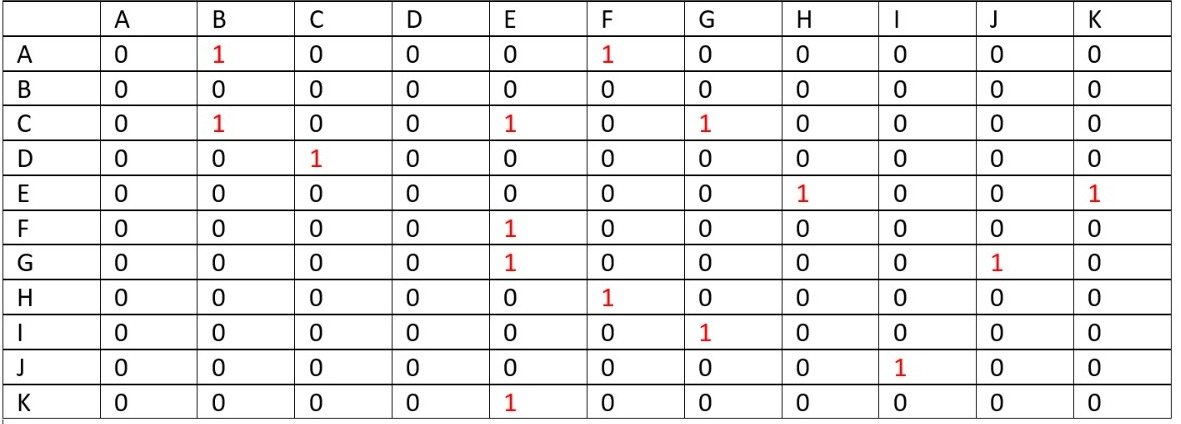

        Now we will create the new graph where the original edges are replaced by "3-hop" edges.

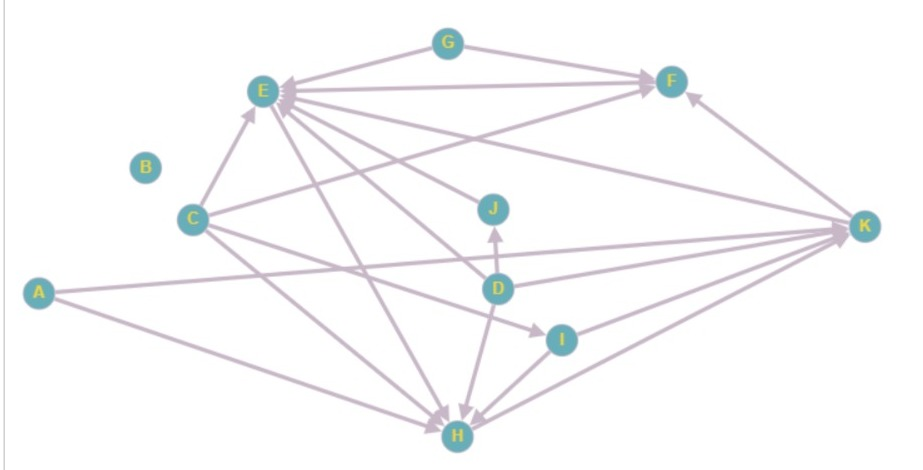

**EX 4.**

Make a transitive closure of the same graph - using two approaches. 1) Multiplication approach: G * G * G...; 3) with Warshall algorithm. Verify that you got the same answer.

1) In the multiplication approach we sum the power of the matrix, so the formula will be like that: 

                                G^1 + G^2 + G^3 + G^4 + G^5 + G^6 + G^7 + G^8 + G^9 + G^10 + G^11.
                                
   I used the online tool(https://matrixcalc.org) to calculate the formula:
   
   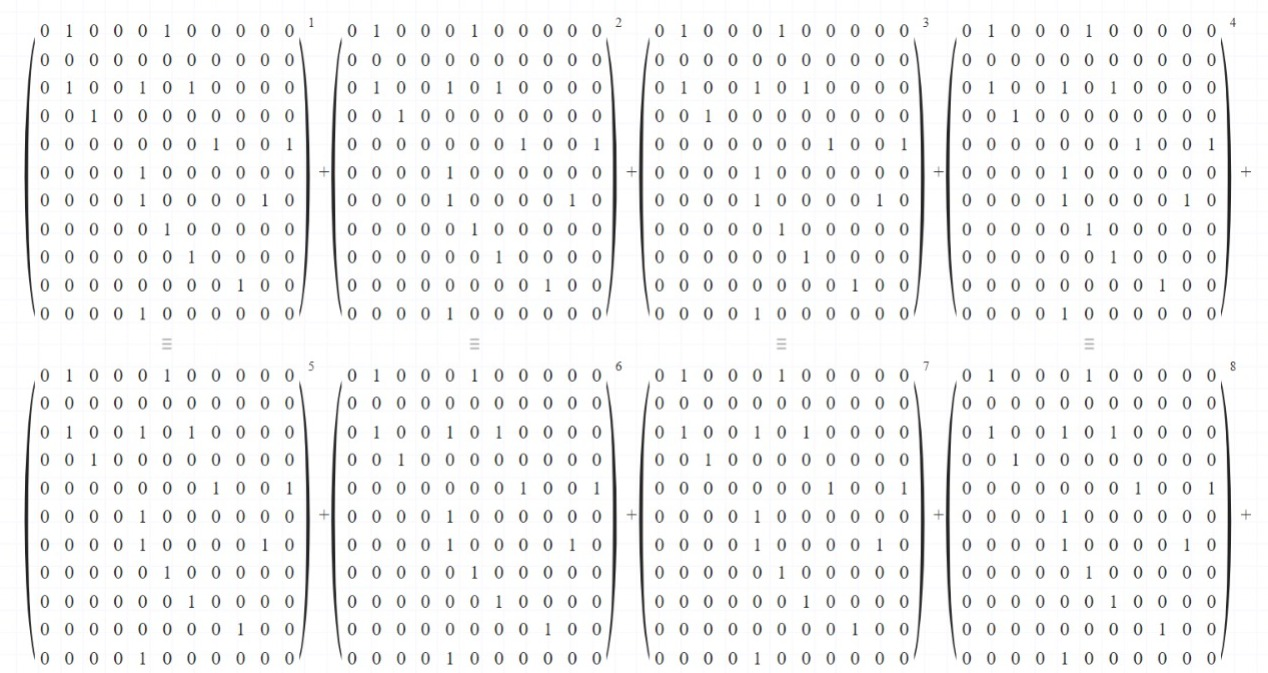

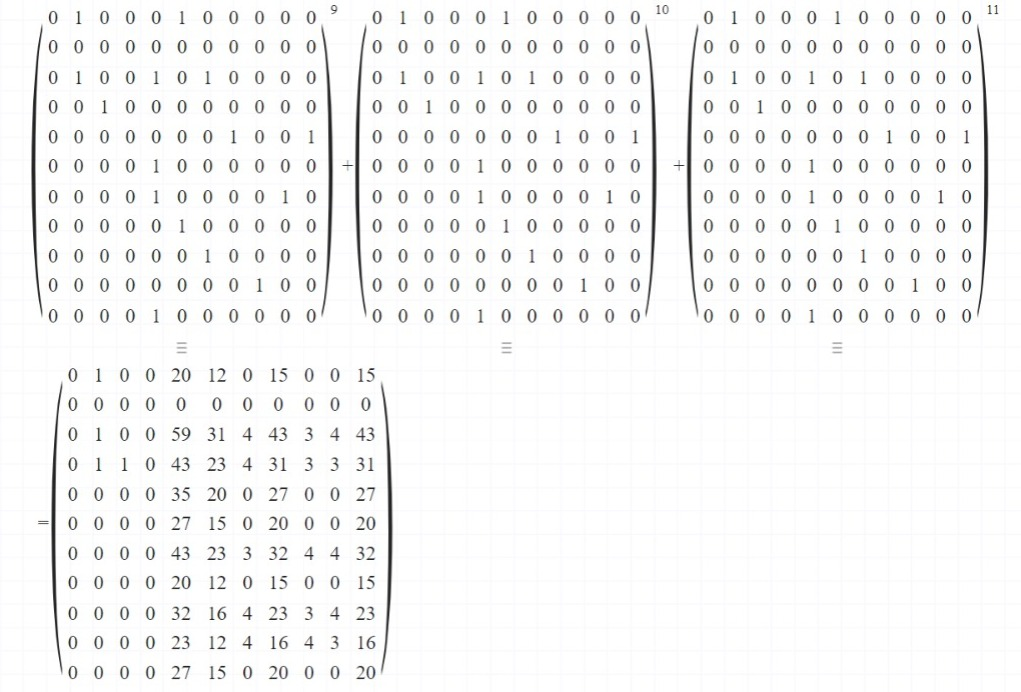

        Here if the elemet of the matrix differ from the "0" we change it to "1". So the result will be like that:

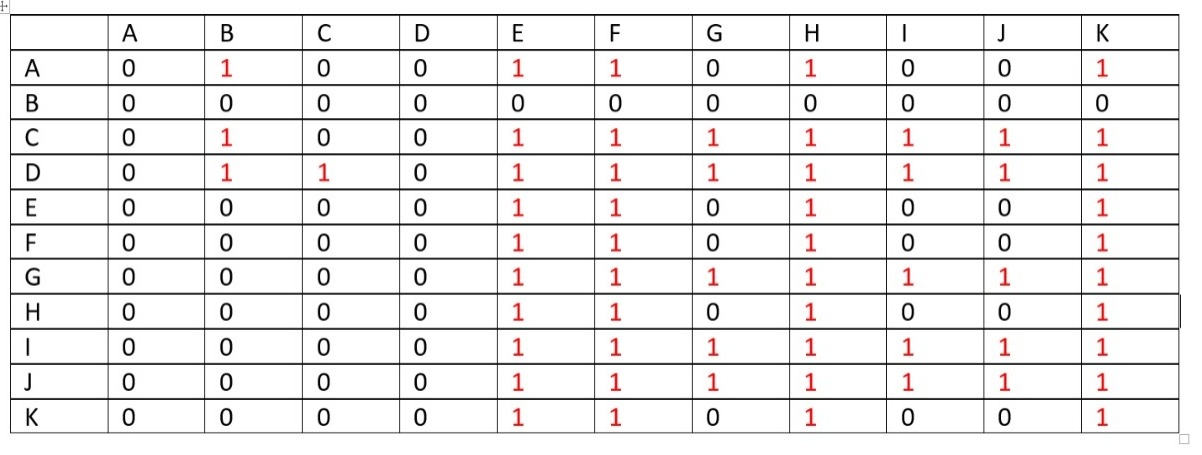

        2) Warshall algoritm: Here we will choosing the columns and rows, for example: AA, BB, CC, ..., KK. After that, we are looking at remaining elements. If the element is "0", we are looking at the choosing column and row, and if both iof them are "1" then "0" will be "1", otherwise it will stay the same. If the element is "1", we will just write "1".


Step1. 

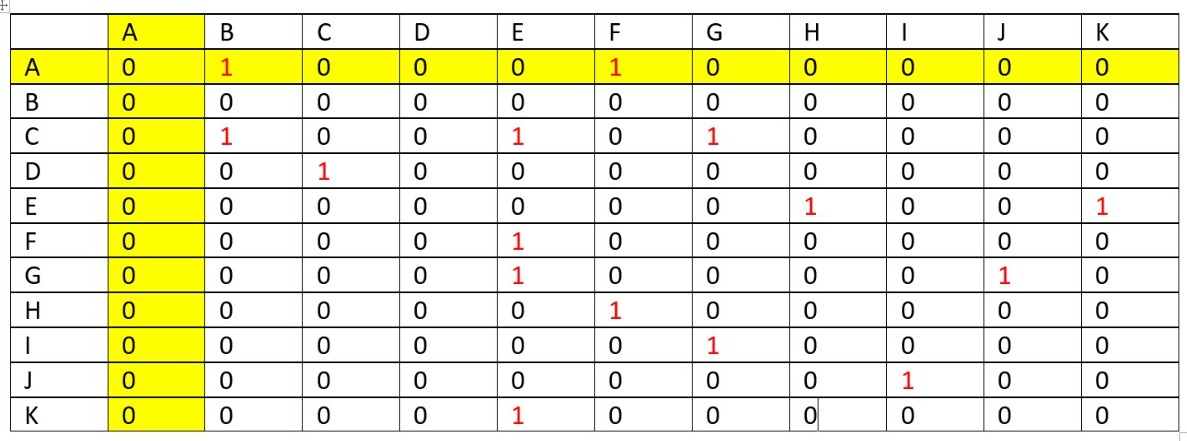

Step2.

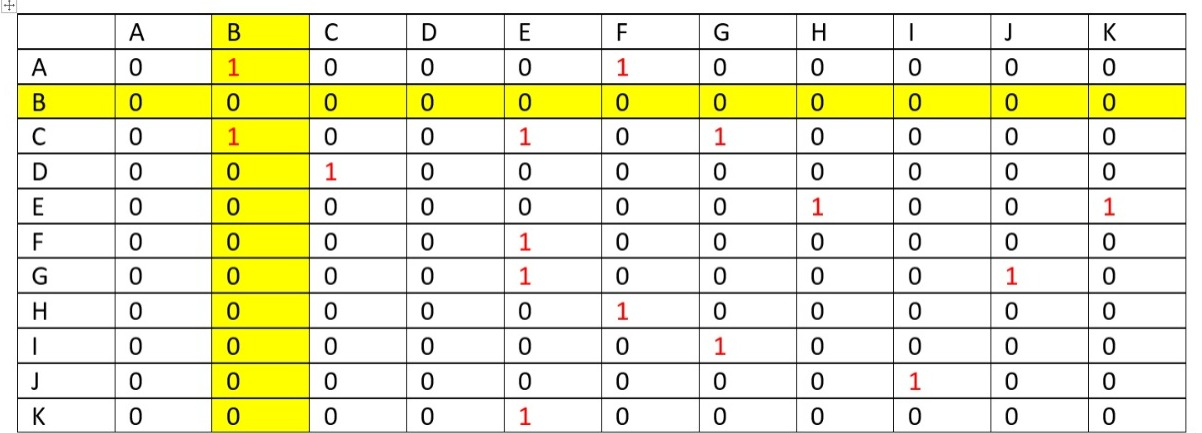

Step3.

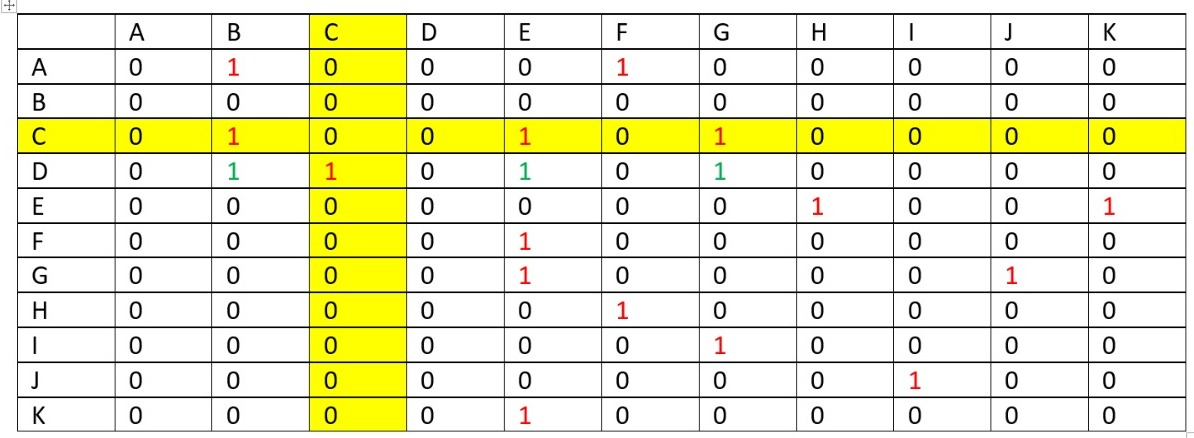

Step4.

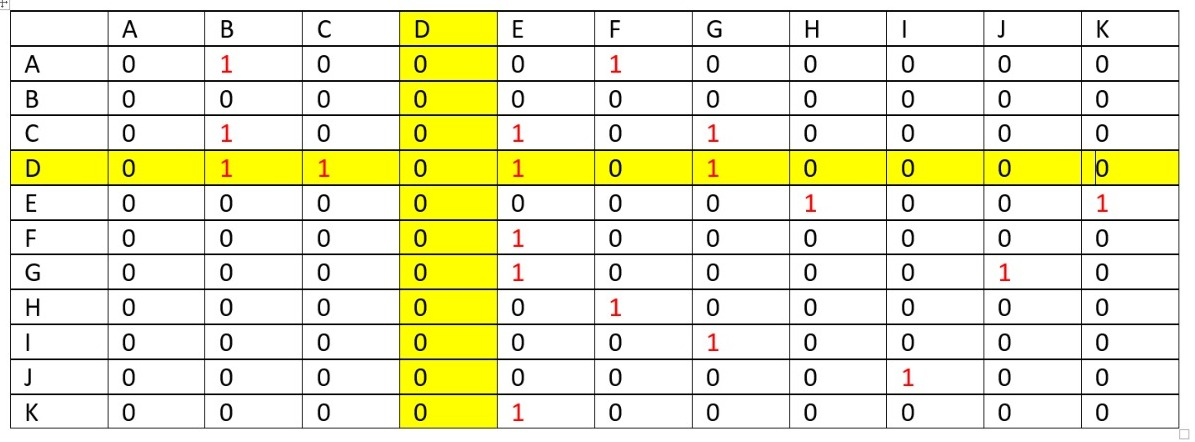

Step5.

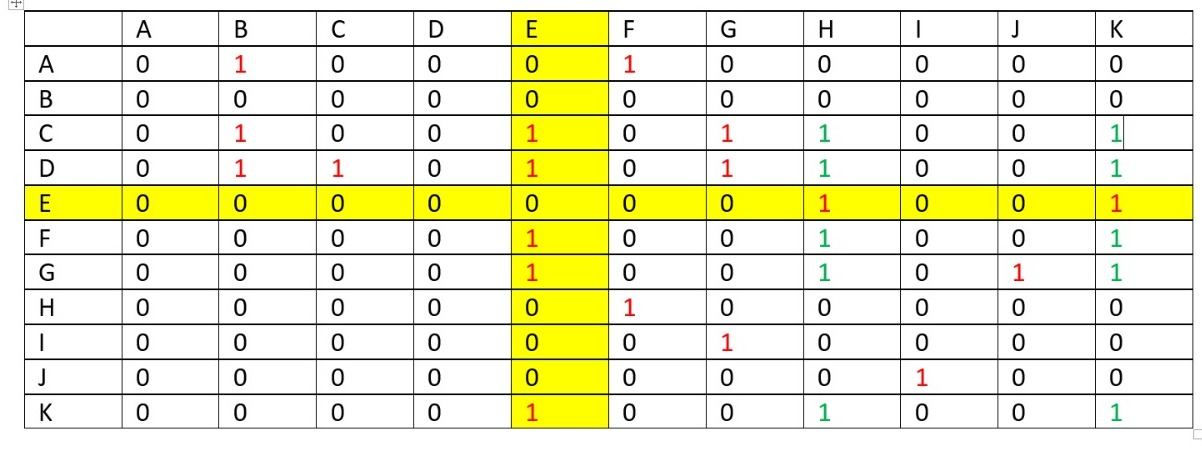

Step6.

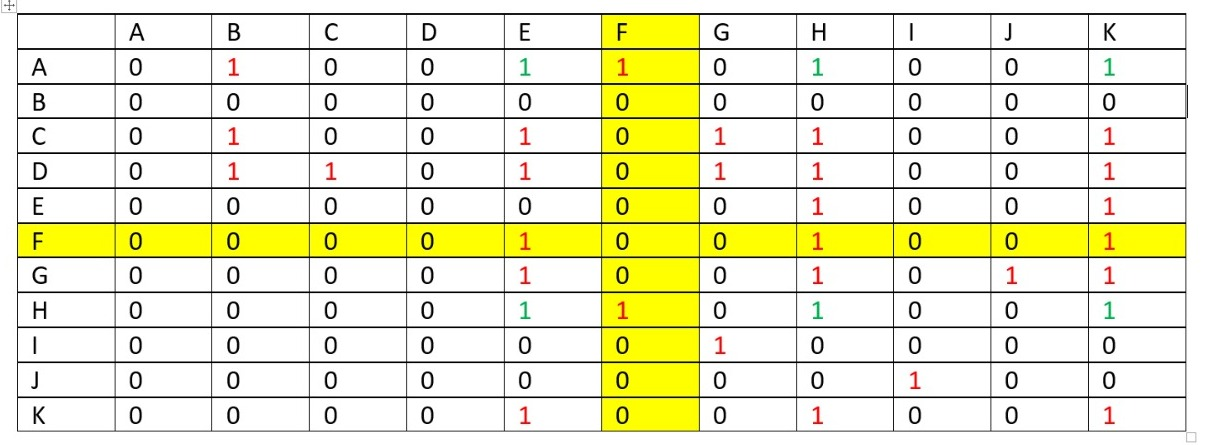

Step7.

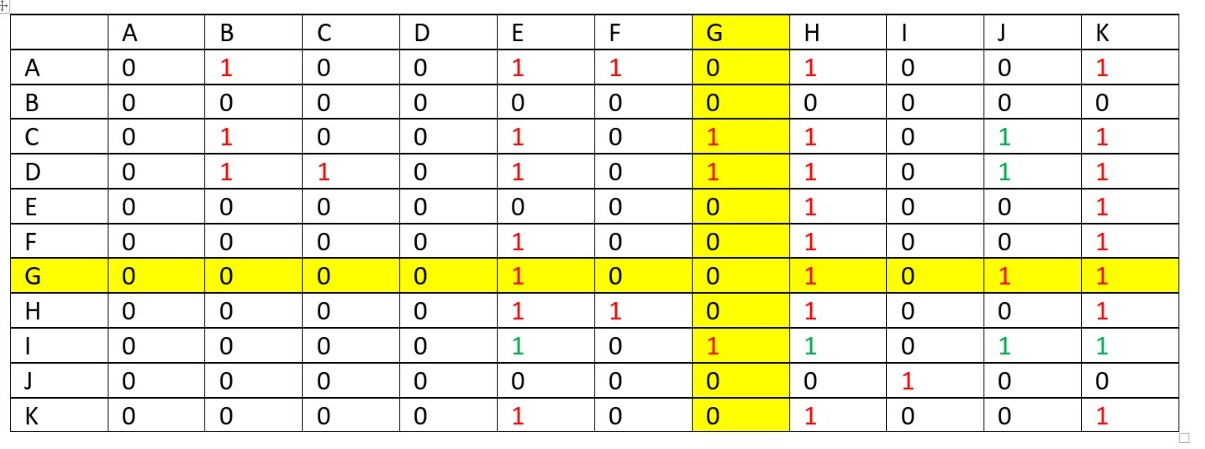

Step8.

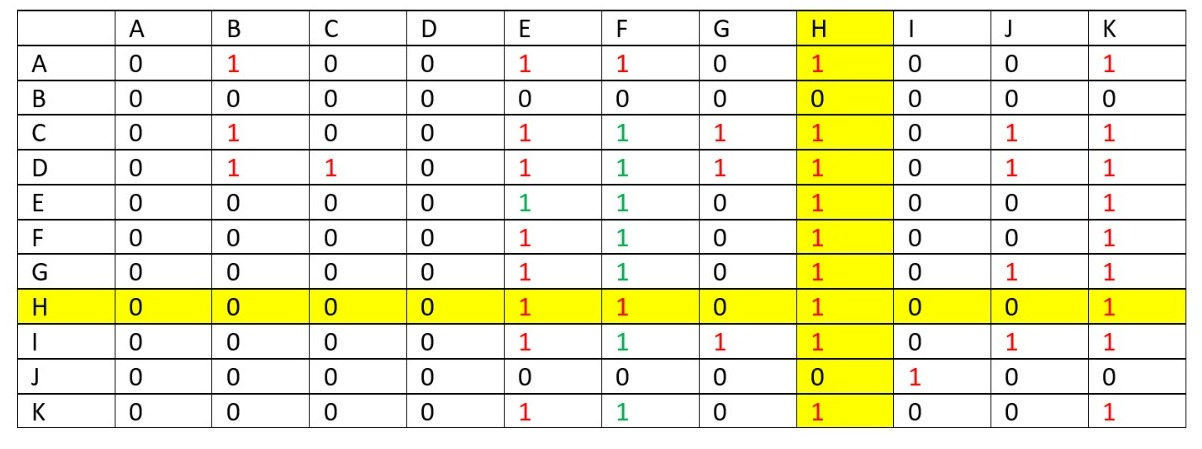

Step9.

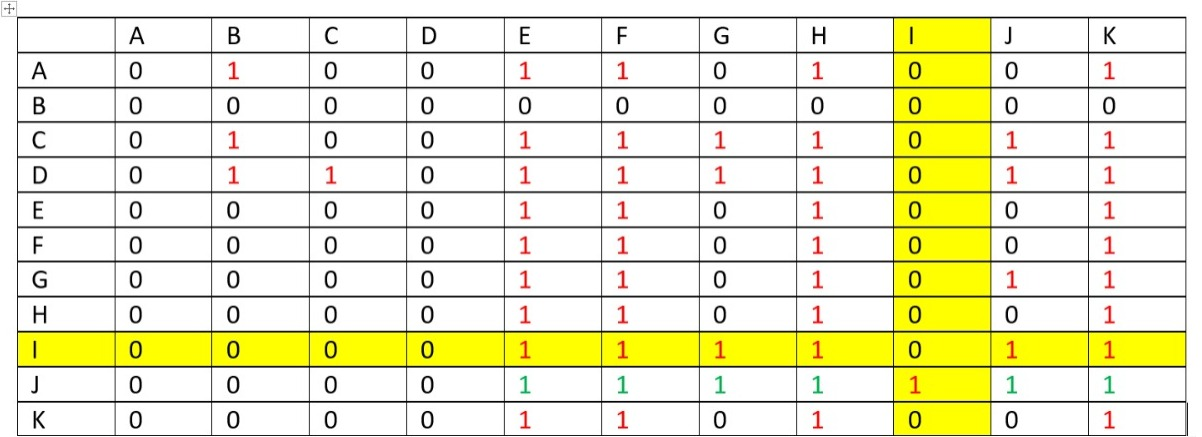

Step10.

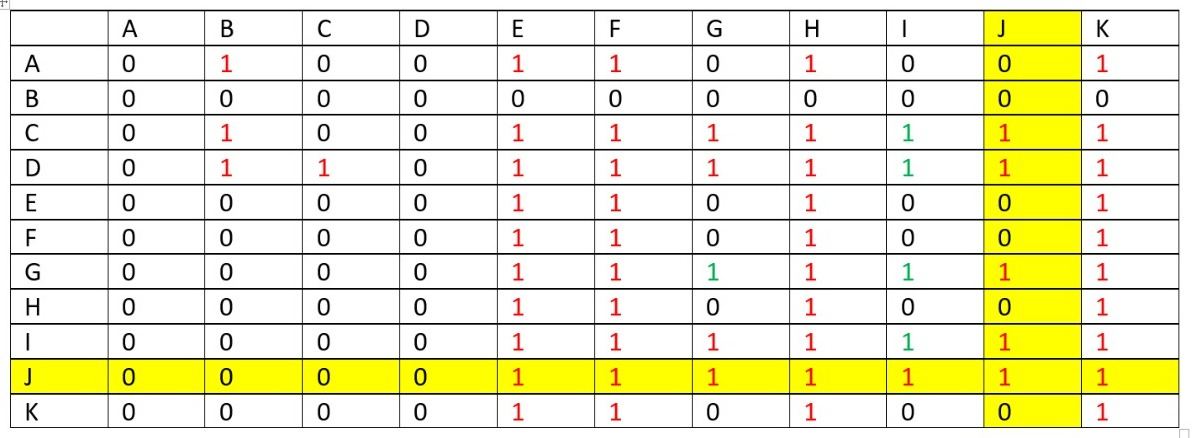

Step11.

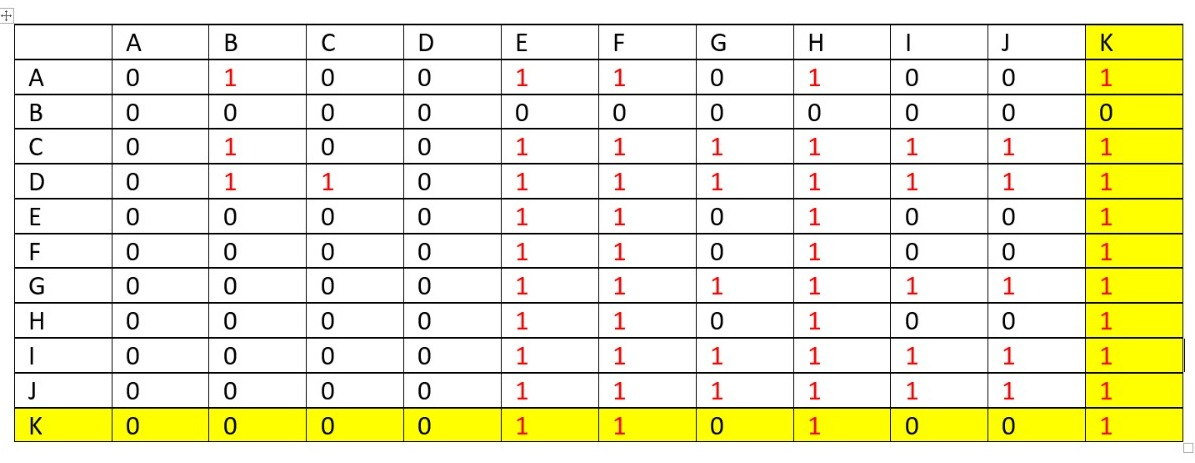

   **Result** : So we got the same result in both approaches.

**EX 5.**

Implement a "random walk" procedure following links randomly (equal probabilities). Using the same graph again, estimate the probability of being in any given node by varying how you deal with "dead ends" (e.g. node B) and "nodes with no links into it" (e.g. nodes D or A). First, try "re-appearing anywhere" from dead ends only. Secondly, when walking, with 20% probability jump to any random vertex in the network, and 80% of times select randomly and go to one of the neighbouring vertices. For both scenarios, provide the respective probabilities and identify the most important nodes.

In [2]:
import random
graph = {"A": ["B", "F"],
         "B": "",
         "C": ["B", "E", "G"],
         "D": "C",
         "E": ["K", "H"],
         "F": "E",
         "G": ["E", "J"],
         "H": "F",
         "I": "G",
         "J": "I",
         "K": "E"
        }

dead_node = "B"
no_link_nodes = ["A", "D"]

nodes = [i for i in graph.keys()]
random_node = random.choice(nodes)

num_of_nodes = len(nodes)
if random_node not in dead_node or random_node not in no_link_nodes:
    probability = (num_of_nodes - len(dead_node) - len(no_link_nodes)) / num_of_nodes * 100
    print("Probability of 're-appearing anywhere' from dead ends only is {}".format(probability))
else:
    probability = (len(dead_node) + len(no_link_nodes)) / num_of_node * 100
    print("Probability of 're-appearing anywhere' from dead ends only is {}".format(probability))

Probability of 're-appearing anywhere' from dead ends only is 72.72727272727273
